# ADReSS 2020 Audio Duration

By: Jimuel Celeste, Jr. 

Objective: To describe the ADReSS Dataset.

## Tools

In [1]:
import contextlib
import datetime
import os 
import wave

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# https://stackoverflow.com/questions/7833807/get-wav-file-length-or-duration
fname = '/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/data/ADReSS2020/train_audio_full_wave/S001.wav'
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

88.8622902494331


In [3]:
def get_duration(file):
    with contextlib.closing(wave.open(file,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration

dur = get_duration(fname)
dur

88.8622902494331

In [4]:
# https://stackoverflow.com/questions/775049/how-do-i-convert-seconds-to-hours-minutes-and-seconds
str(datetime.timedelta(seconds=666))

'0:11:06'

In [5]:
def convert_to_mins(seconds):
    return datetime.timedelta(seconds=seconds)

convert_to_mins(seconds=dur)

datetime.timedelta(seconds=88, microseconds=862290)

## Dataset

In [6]:
input_dir = '/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/data/ADReSS2020/train_audio_full_wave'

metadata_file = os.path.join(input_dir, 'metadata.csv')
metadata = pd.read_csv(metadata_file)
metadata.head()

,record_id,age,gender,mmse,dx,binary_label,filename,subject_id
0,S001,74,male,NaN,HC,0,S001.wav,S001
1,S002,62,female,30.0,HC,0,S002.wav,S002
2,S003,69,female,29.0,HC,0,S003.wav,S003
3,S004,71,female,30.0,HC,0,S004.wav,S004
4,S005,74,female,30.0,HC,0,S005.wav,S005


In [7]:
durs = []
for file in metadata['filename']:
    input_file = os.path.join(input_dir, file)
    dur = get_duration(input_file)
    # dur = convert_to_mins(seconds=dur)
    durs.append(dur)
durs = pd.DataFrame(durs, columns=["time"])

In [8]:
durs

,time
0,88.862290
1,57.095102
2,69.144671
3,100.540340
4,81.311610
...,...
103,28.468050
104,28.807007
105,69.894580
106,41.478594


In [9]:
desc = durs.describe()
desc

,time
count,108.000000
mean,72.096518
std,35.337900
min,28.468050
25%,51.730334
50%,64.372381
75%,82.903730
max,224.564989


In [10]:
desc['time'].apply(lambda x: convert_to_mins(seconds=x))

count          0 days 00:01:48
mean    0 days 00:01:12.096518
std     0 days 00:00:35.337900
min     0 days 00:00:28.468050
25%     0 days 00:00:51.730334
50%     0 days 00:01:04.372381
75%     0 days 00:01:22.903730
max     0 days 00:03:44.564989
Name: time, dtype: timedelta64[ns]

In [11]:
sns.set_context('paper')
sns.set_style('white')

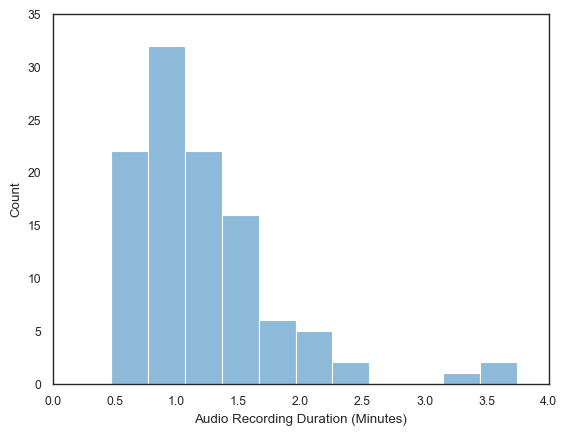

In [12]:
plt.ylim(0, 35)
plt.xlim(0, 4)
plt.xlabel('Audio Recording Duration (Minutes)')
ax = sns.histplot(
    durs.apply(lambda x: x/60), 
    bins=11
)
ax.get_legend().remove()

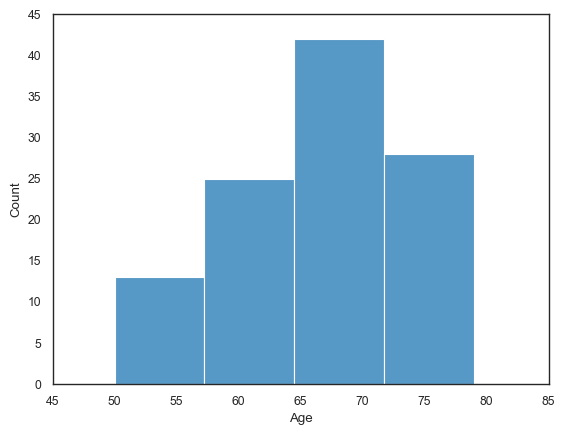

In [13]:
plt.ylim(0, 45)
plt.xlim(45, 85)
plt.xlabel('Age')
ax = sns.histplot(
    metadata['age'],#.value_counts(), 
    bins=4
)

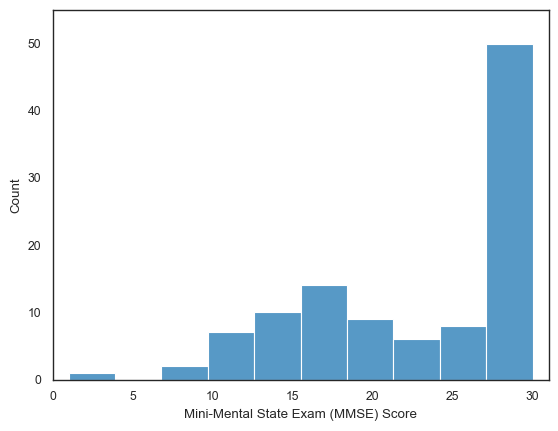

In [14]:
plt.ylim(0, 55)
plt.xlim(0, 31)
plt.xlabel('Mini-Mental State Exam (MMSE) Score')
ax = sns.histplot(
    metadata['mmse'],
    bins=10
)

In [15]:
pd.DataFrame({
    'age': metadata['age'].values, 
    'mmse': metadata['mmse'].values,
    'duration': durs['time'].values
}).corr()

,age,mmse,duration
age,1.000000,-0.072467,0.033836
mmse,-0.072467,1.000000,-0.322179
duration,0.033836,-0.322179,1.000000


<Axes: xlabel='dx', ylabel='mmse'>

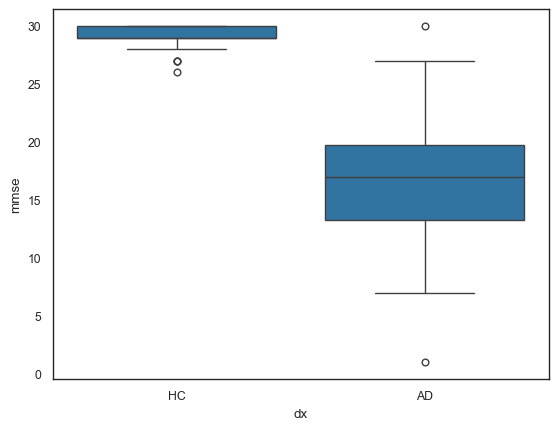

In [16]:
sns.boxplot(
    data=metadata, 
    x="dx", 
    y="mmse"
)